1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)
4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [334]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, cross_val_predict
import numpy as np
from sklearn import metrics

# 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [335]:
cars_df = pd.read_csv('cars-dataset.csv')

In [336]:
cars_df.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [337]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [338]:
cars_df.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [339]:
#There is question mark in horsepower, so we will need to replace it with median of horse power.
cars_df.loc[cars_df['hp']=="?",'hp']= cars_df.loc[cars_df['hp']!= "?",'hp'].median()

In [340]:
cars_df.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [341]:
cars_df['hp'] = pd.to_numeric(cars_df['hp'])
cars_df

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198.0,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220.0,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215.0,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225.0,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190.0,3850,8.5,70,15.0


# 2 Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points



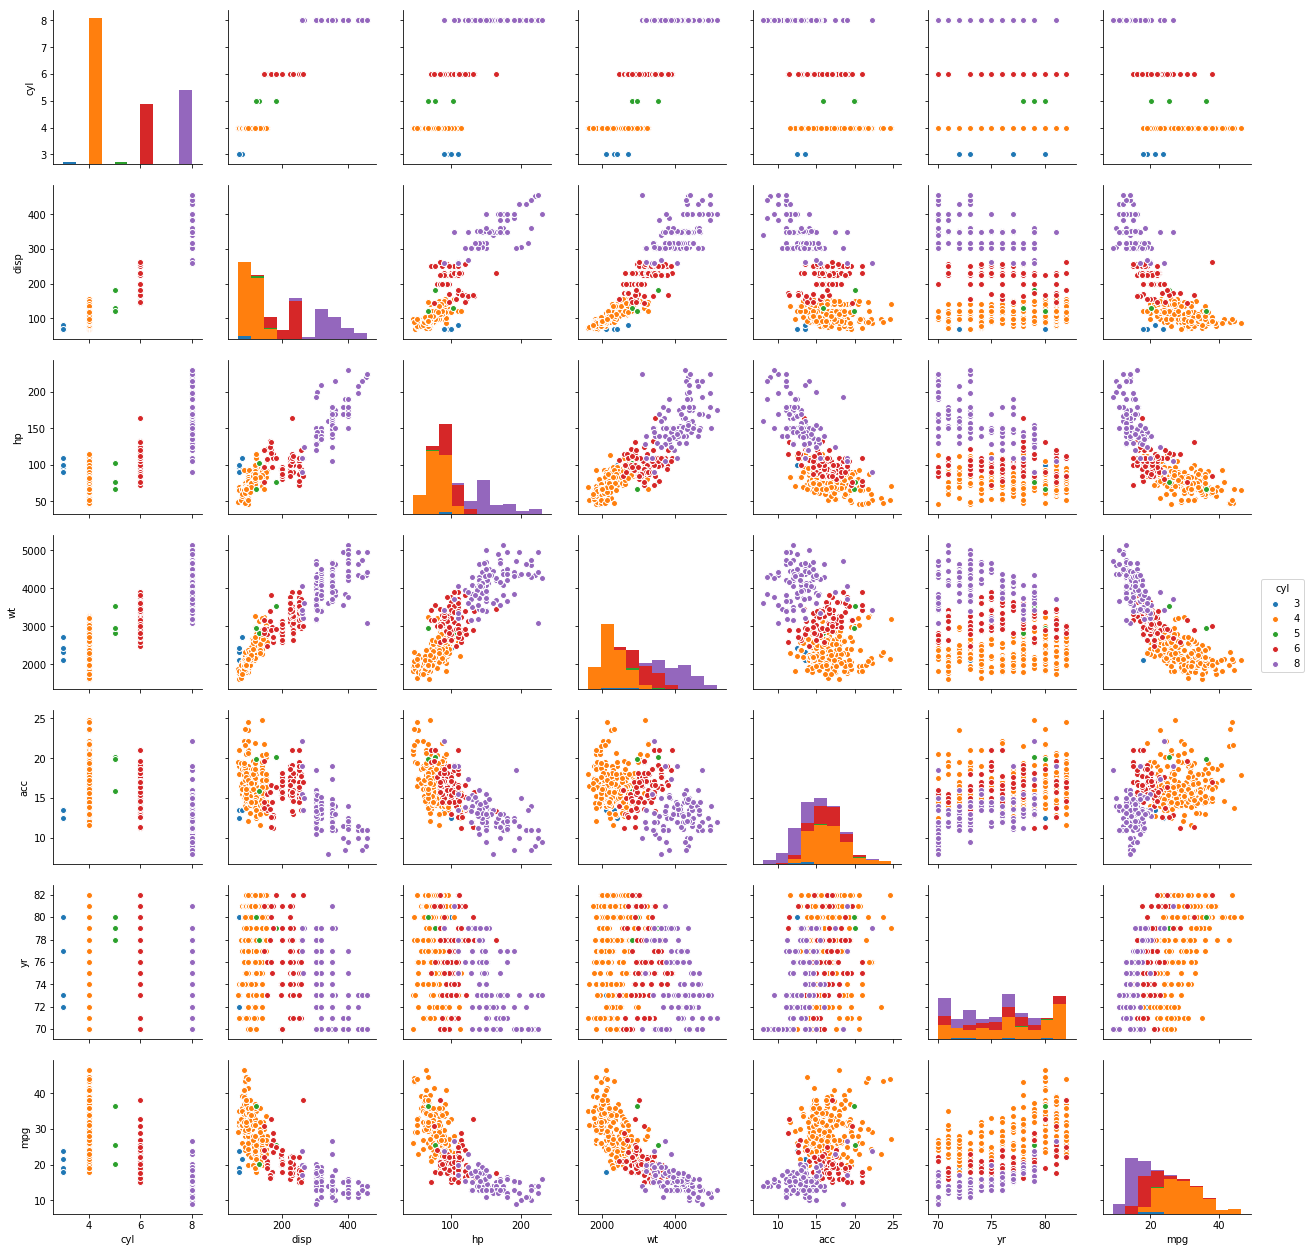

In [342]:
sns.pairplot(cars_df, hue="cyl")

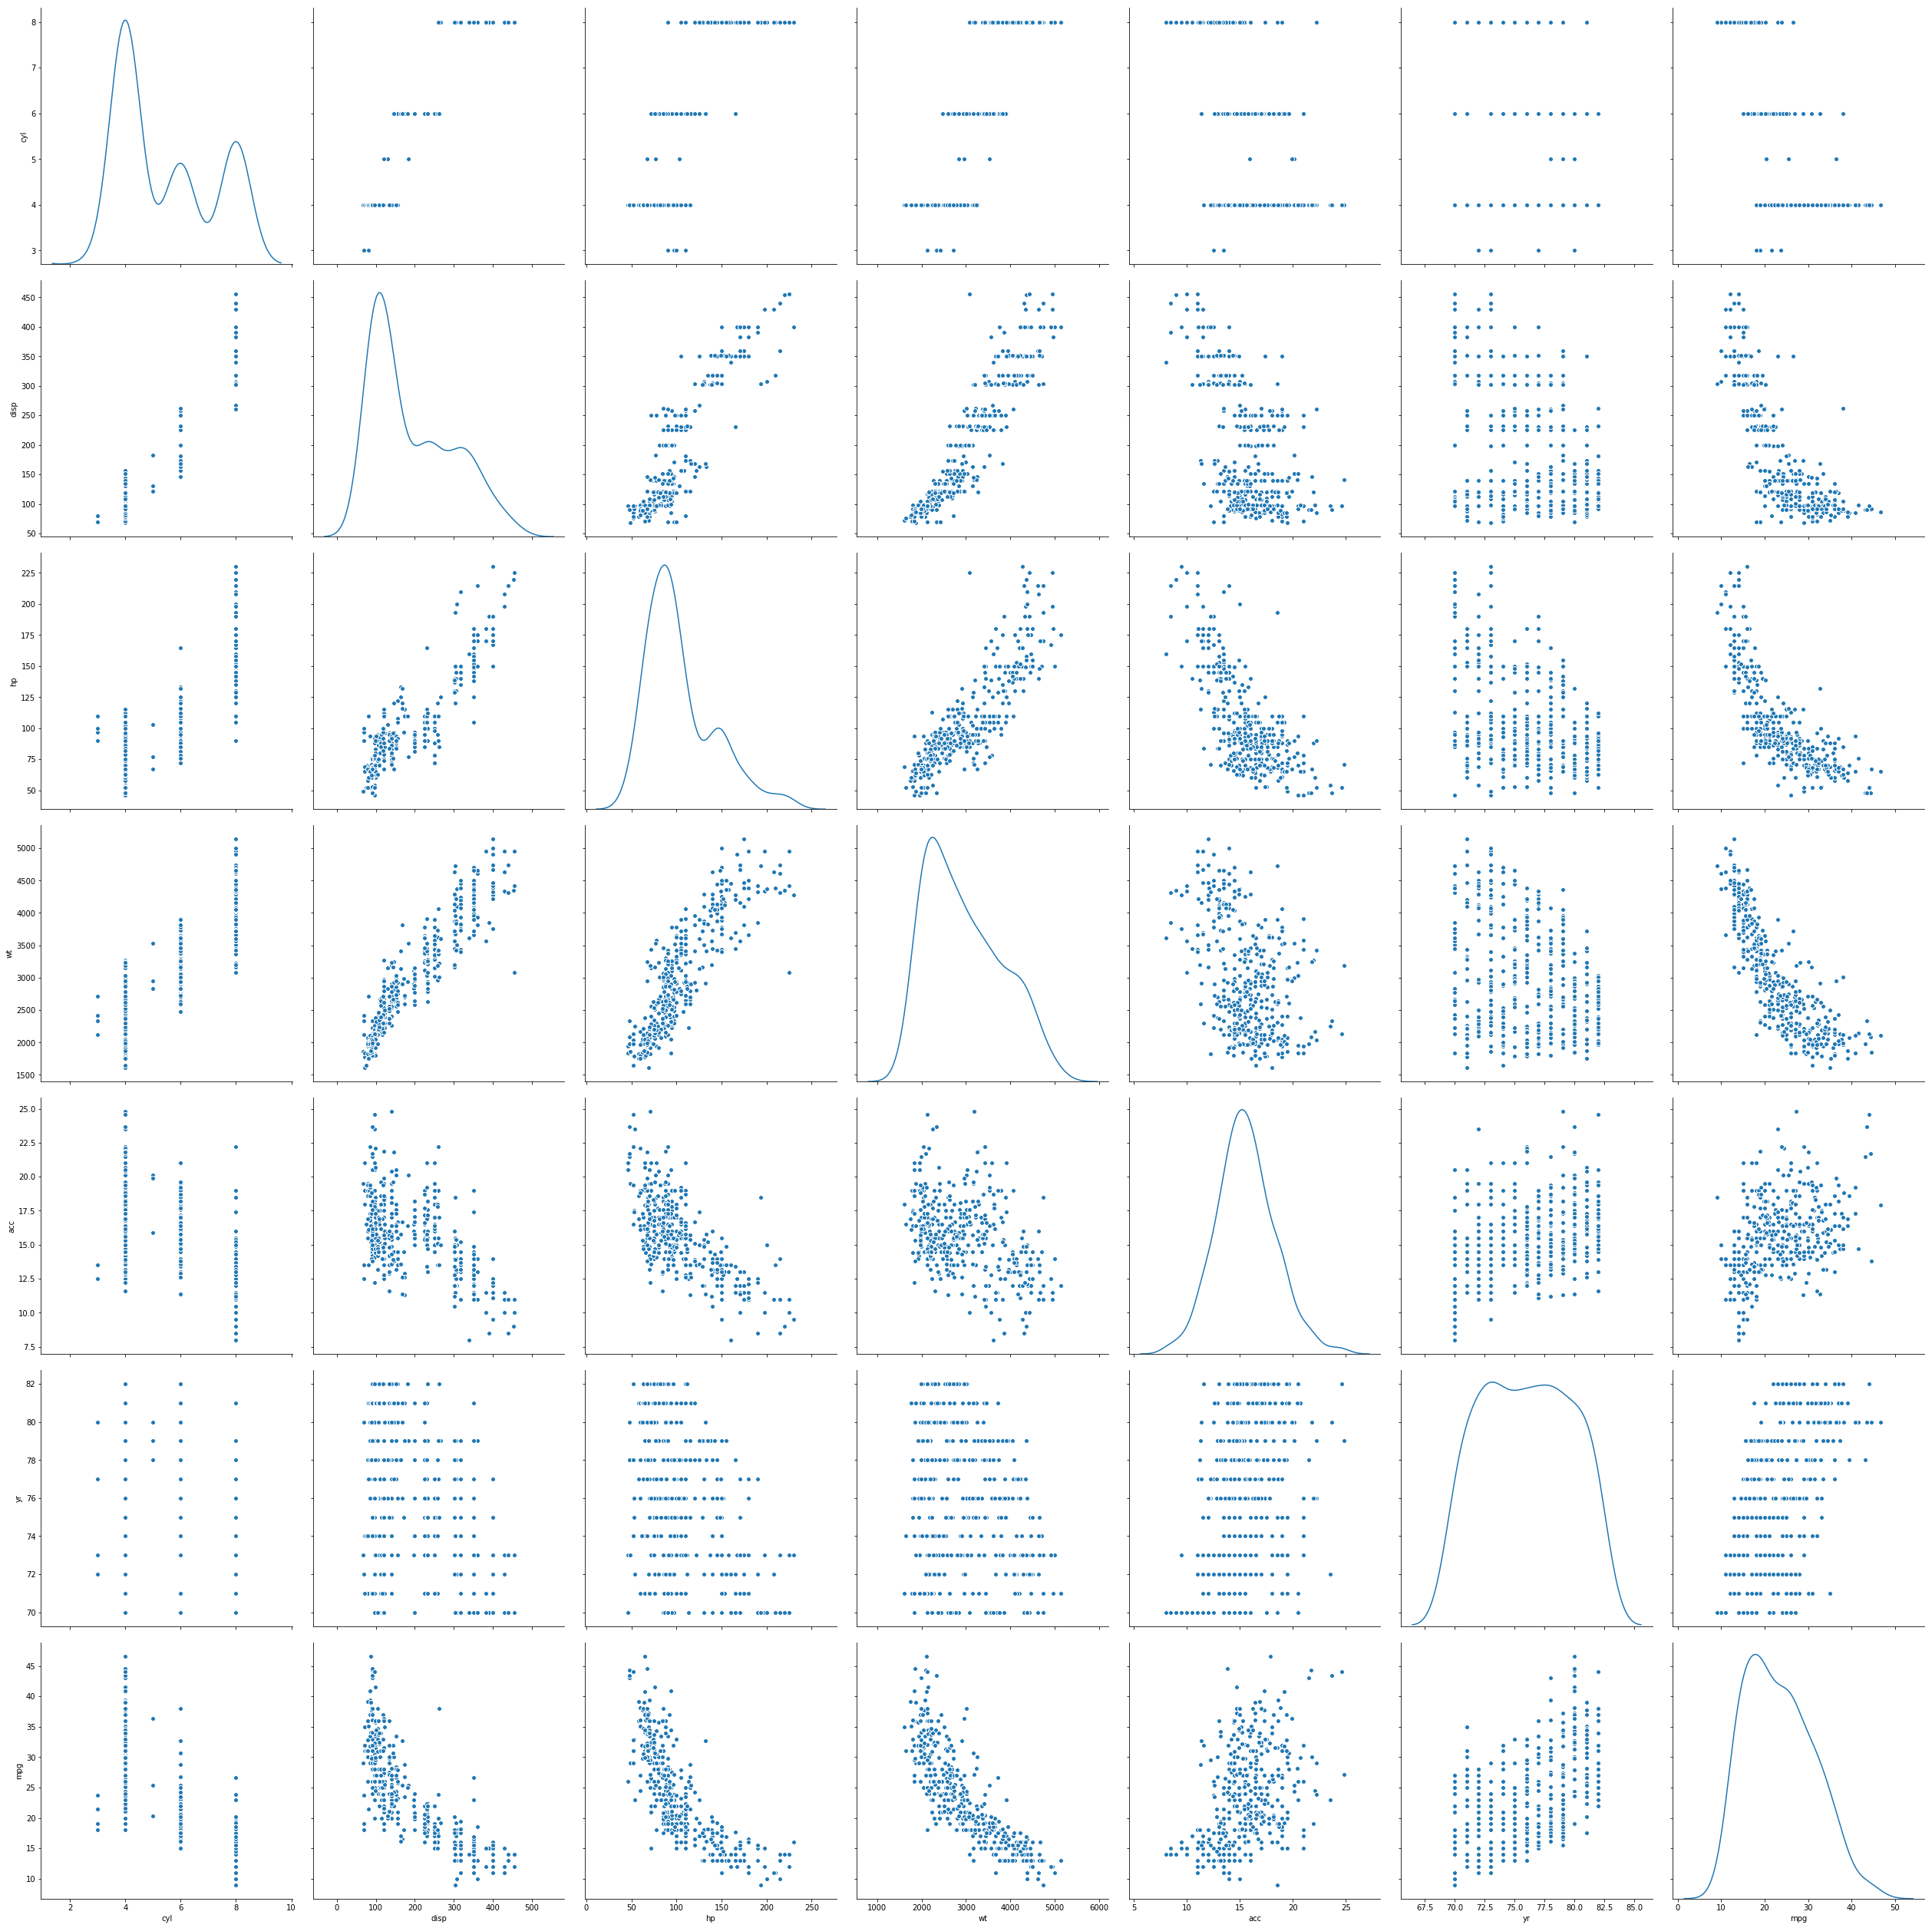

In [343]:
sns.pairplot(cars_df, size=5,aspect=1 , diag_kind='kde')

In [ ]:
#observations
#Observing the Gaussians, we can see around (2*2) clusters getting formed in 4 dimensions.
#Some features do show a linear relation


**feature engineering to remove extra columns**

In [345]:
cars_df.drop('car name', axis=1, inplace = True)

**age of cars**

In [346]:
cars_df['age']= 83 - cars_df['yr']
cars_df.drop('yr', axis=1, inplace=True)

# 3) Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [347]:
#k medoids
#scaling the data

scaled_cars_df = cars_df.apply(zscore)
scaled_cars_df.head(10)

,cyl,disp,hp,wt,acc,mpg,age
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,1.627426
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.090751,1.627426
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.218855,1.627426
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.218855,1.627426
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.218855,1.627426
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.090751,1.627426


In [348]:
# Hierarchial clustering with silhouette coefficient

In [349]:
range_n_clusters = [2, 3, 4, 5, 6]
X = scaled_cars_df

For n_clusters = 2 The average silhouette_score is : 0.48550123101274584
For n_clusters = 3 The average silhouette_score is : 0.3387303154030118
For n_clusters = 4 The average silhouette_score is : 0.32106215945291433
For n_clusters = 5 The average silhouette_score is : 0.2960219022899629
For n_clusters = 6 The average silhouette_score is : 0.25336164237204695


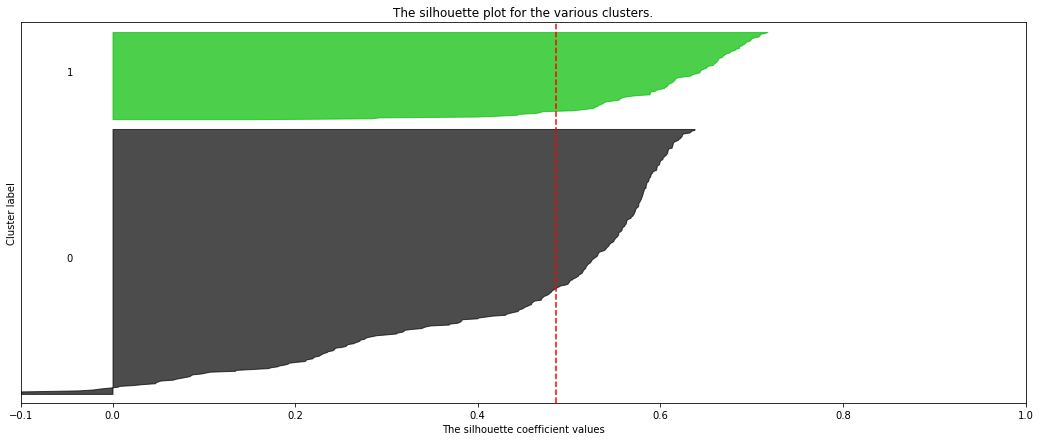

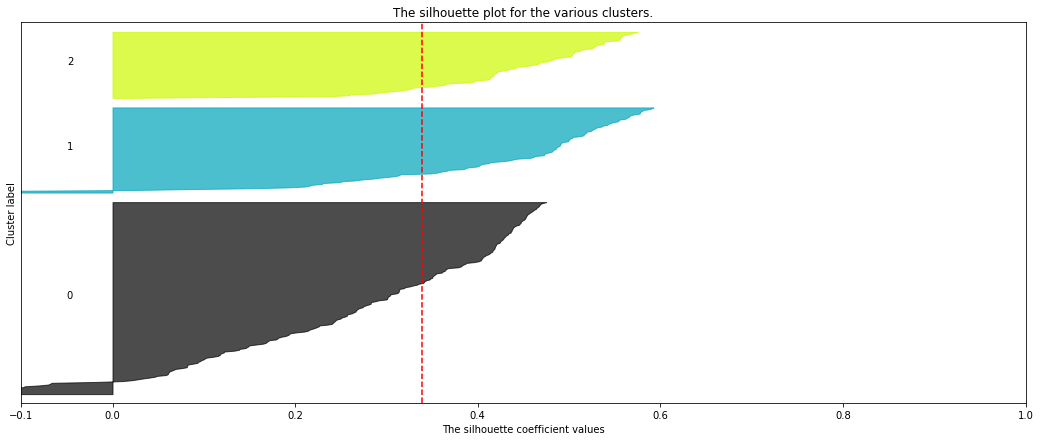

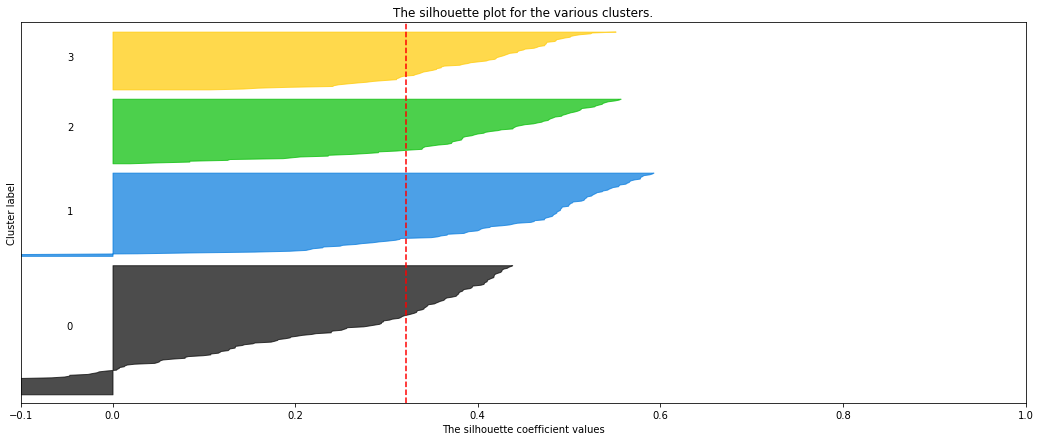

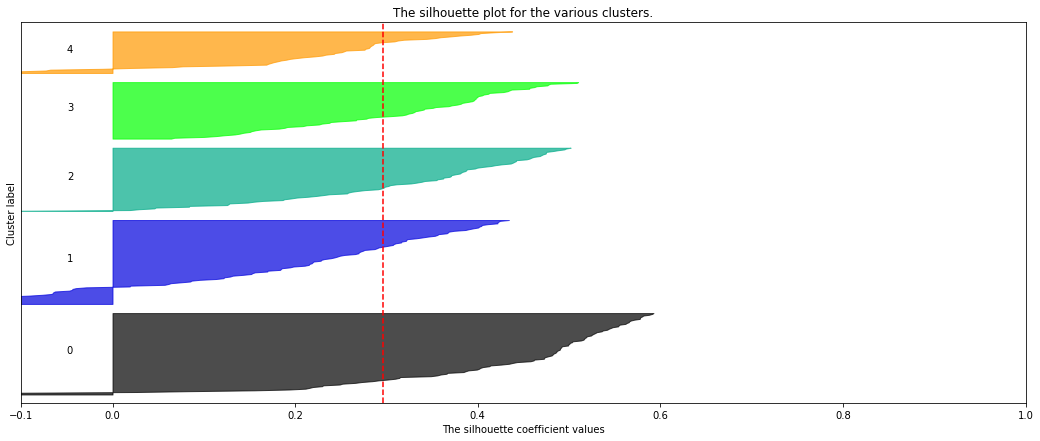

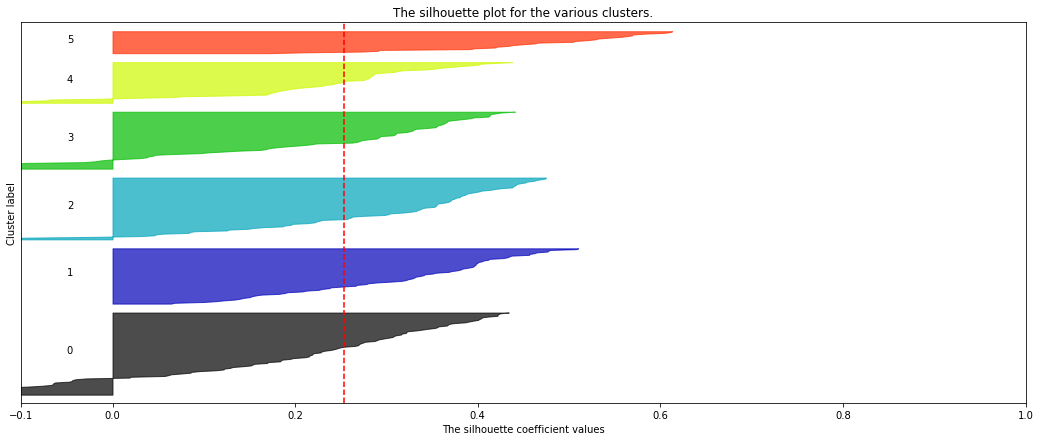

In [350]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters,)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
plt.show()

Observations:
    

In [ ]:
#-->On observing the clusters, the 4 cluster graph looks like the tighter and equally spaced. So applying linear regression for 4 clusters.
#-->The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
#--> even though 2 clusters show a better silhouette coefficient, the four cluster graph gives better clusters.


In [351]:
model = AgglomerativeClustering(n_clusters = 4)

In [352]:
%timeit model.fit(scaled_cars_df)
scaled_cars_df['labels'] = model.labels_

scaled_cars_df.groupby(["labels"]).count()

4.37 ms ± 87.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


,cyl,disp,hp,wt,acc,mpg,age
labels,,,,,,,
0,153,153,153,153,153,153,153
1,99,99,99,99,99,99,99
2,77,77,77,77,77,77,77
3,69,69,69,69,69,69,69


In [353]:
scaled_cars_df.head(5)

,cyl,disp,hp,wt,acc,mpg,age,labels
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,1.627426,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,1.627426,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,1.627426,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,1.627426,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,1.627426,1


# 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [354]:
 

for labels in scaled_cars_df['labels'].unique():
    cars_ds = scaled_cars_df.where(scaled_cars_df['labels'] == labels).dropna()
    
    Ym = cars_ds[['mpg']]
    Xm = cars_ds[['cyl','disp','hp','wt','acc','age']]
    Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm, Ym, test_size=0.2, random_state=10)
    
    lms = LinearRegression()
    lms.fit(Xm_train,Ym_train)
    mpredictions = lms.predict(Xm_test)
    print('Coefficients: \n ', lms.coef_)
    print('MAE:', metrics.mean_absolute_error(Ym_test, mpredictions))
    print('MSE:', metrics.mean_squared_error(Ym_test, mpredictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(Ym_test, mpredictions)))
    r_squared = metrics.r2_score(Ym_test,mpredictions)
    print('RSquare for label:',labels,"-", r_squared)
    print('Score:',lms.score(Xm_test, Ym_test))

Coefficients: 
  [[ 0.01084336 -0.05830962 -0.09736034 -0.15806552 -0.15028513 -0.20058336]]
MAE: 0.13034320765814092
MSE: 0.035280764239663844
RMSE: 0.1878317444940121
RSquare for label: 1 - 0.5131931642962471
Score: 0.5131931642962471
Coefficients: 
  [[ 2.19921665 -0.94822663 -0.06360515 -0.53400814 -0.06961574 -0.05615785]]
MAE: 0.25877115848423543
MSE: 0.09360073253130026
RMSE: 0.3059423679899537
RSquare for label: 3 - 0.584609969710142
Score: 0.584609969710142
Coefficients: 
  [[ 0.42792342  0.04304525 -0.10271561 -0.30778269 -0.09020012 -0.1455237 ]]
MAE: 0.19670643103693453
MSE: 0.06076192663840549
RMSE: 0.24649934409325613
RSquare for label: 2 - 0.42081538691741616
Score: 0.42081538691741616
Coefficients: 
  [[ 0.39671621 -0.10449012 -0.64133233 -0.680838    0.05553505 -0.39148169]]
MAE: 0.38655602645557985
MSE: 0.2374884091383125
RMSE: 0.4873278251221784
RSquare for label: 0 - 0.6611006707185502
Score: 0.6611006707185502
